In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("marketing_conversion_dataset.csv")  
df

,customer_id,channel,spend,conversion,region,age_group,time_of_day
0,CUST1000,Search Ads,186.76,1,South,35-44,Night
1,CUST1001,Referral,115.20,0,South,55+,Evening
2,CUST1002,Social Media,140.85,0,West,25-34,Morning
3,CUST1003,Referral,184.89,0,West,55+,Night
4,CUST1004,Referral,142.91,1,East,18-24,Night
...,...,...,...,...,...,...,...
995,CUST1995,SMS,148.80,1,East,45-54,Morning
996,CUST1996,Email,104.88,0,West,18-24,Morning
997,CUST1997,Email,137.64,0,Central,45-54,Afternoon
998,CUST1998,Search Ads,13.13,0,East,35-44,Afternoon


In [10]:
print(df.shape)
print(df.info())

(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1000 non-null   object 
 1   channel      1000 non-null   object 
 2   spend        1000 non-null   float64
 3   conversion   1000 non-null   int64  
 4   region       1000 non-null   object 
 5   age_group    1000 non-null   object 
 6   time_of_day  1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB
None


In [11]:
#basic cleaning
print(df.isnull().sum())
df = df.drop_duplicates()

customer_id    0
channel        0
spend          0
conversion     0
region         0
age_group      0
time_of_day    0
dtype: int64


In [12]:
#most effective marketing chanel
conversion_by_channel = df.groupby('channel')['conversion'].mean().sort_values(ascending=False)
conversion_by_channel

channel
Referral        0.357843
SMS             0.342105
Search Ads      0.281553
Email           0.280952
Social Media    0.242105
Name: conversion, dtype: float64

In [13]:
#pattern conversion by time of day or region
conversion_by_time = df.groupby('time_of_day')['conversion'].mean().sort_values(ascending=False)
conversion_by_region = df.groupby('region')['conversion'].mean().sort_values(ascending=False)
conversion_by_time, conversion_by_region

(time_of_day
 Evening      0.325581
 Night        0.311404
 Afternoon    0.307393
 Morning      0.260700
 Name: conversion, dtype: float64,
 region
 South      0.340314
 North      0.313433
 Central    0.305825
 East       0.297674
 West       0.245989
 Name: conversion, dtype: float64)

In [14]:
#spend correlation with conversion

avg_spend_converted = df[df['conversion'] == 1]['spend'].mean()
avg_spend_not_converted = df[df['conversion'] == 0]['spend'].mean()
correlation = df['spend'].corr(df['conversion'])
avg_spend_converted, avg_spend_not_converted, correlation

(108.03415282392035, 100.18516452074397, 0.06310544513820607)

In [ ]:
#Visualizations

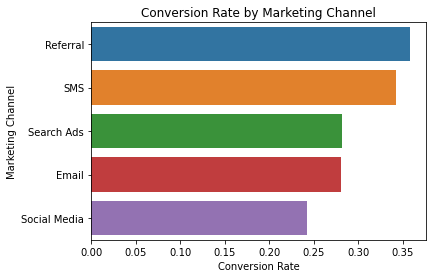

In [19]:
#conversion rate by markering chanel
channel_conversion = df.groupby('channel')['conversion'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=channel_conversion, x='conversion', y='channel')
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('Marketing Channel')
plt.show()


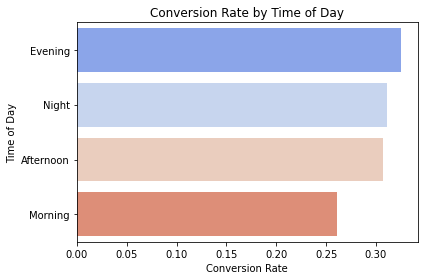

In [18]:
#conversion by time of day
time_conversion = df.groupby('time_of_day')['conversion'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=time_conversion, x='conversion', y='time_of_day')
plt.title('Conversion Rate by Time of Day')
plt.xlabel('Conversion Rate')
plt.ylabel('Time of Day')
plt.show()

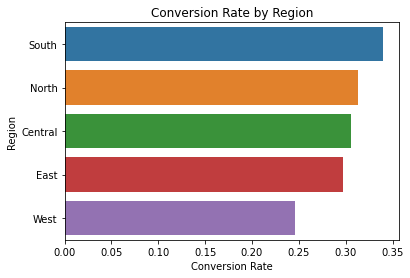

In [20]:
#coversion by region
region_conversion = df.groupby('region')['conversion'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=region_conversion, x='conversion', y='region')
plt.title('Conversion Rate by Region')
plt.xlabel('Conversion Rate')
plt.ylabel('Region')
plt.show()